In [1]:
import numpy as np
from scipy.spatial import Delaunay, minkowski_distance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.sparse import coo_array
import scipy.sparse.linalg as spla
import meshio
from icosphere import icosphere
from mesh import Mesh
from geometry import dual_grid

points, simplices = icosphere(7)
print(points, simplices)
points, simplices = dual_grid(points, simplices)
print(points, simplices)
point_normals = points / np.linalg.norm(points,axis=-1,keepdims=True)
mesh = Mesh(points, simplices, point_normals)

barycenters = np.array([np.mean(points[simplice],axis=0) for simplice in simplices])
barynormals = np.array([np.mean(point_normals[simplice],axis=0) for simplice in simplices])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
[[ 0.          0.52573111  0.85065081]
 [ 0.         -0.52573111  0.85065081]
 [ 0.52573111  0.85065081  0.        ]
 ...
 [-0.54055703  0.42642078 -0.72523335]
 [-0.67849025  0.32852732 -0.65705463]
 [-0.78737848  0.22677064 -0.57324534]] [[  0  36  12]
 [ 36  37 192]
 [ 36 192  12]
 ...
 [491 166 167]
 [491 167 107]
 [107 167  10]]
[[-0.04356307  0.47140172  0.8767936 ]
 [-0.18234377  0.41927806  0.88453544]
 [-0.09028039  0.41164958  0.90242014]
 ...
 [-0.75399636  0.15941197 -0.63049472]
 [-

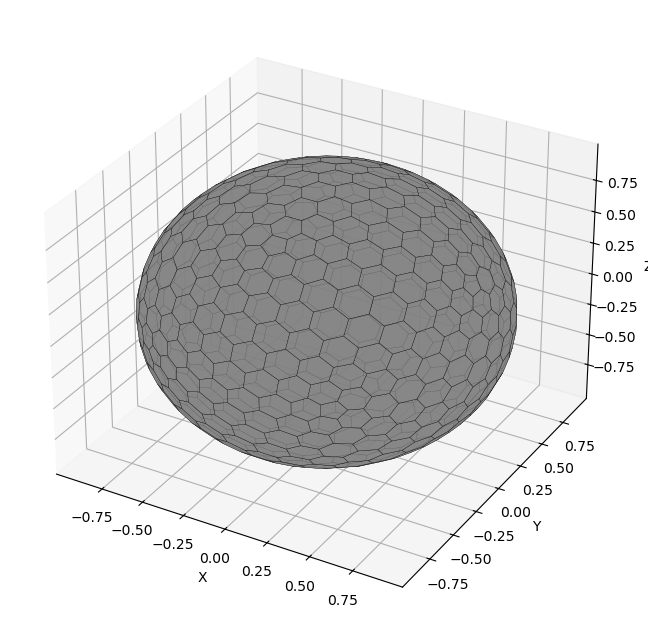

In [2]:

# Setup for a 3D plot
fig = plt.figure(figsize=(22,8))
ax = fig.add_subplot(111, projection='3d')

# Plot each simplex
for simplex in simplices:
    polygon = points[simplex]
    ax.add_collection3d(Poly3DCollection([polygon], facecolors='grey', linewidths=.2, edgecolors='k', alpha=.75))

# Set plot display parameters
#ax.scatter(points[:,0], points[:,1], points[:,2], color='b')  # Plot the points
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Adjusting the scale for better visualization
max_range = np.array([points[:,0].max()-points[:,0].min(), 
                      points[:,1].max()-points[:,1].min(), 
                      points[:,2].max()-points[:,2].min()]).max() / 2.0
mid_x = (points[:,0].max()+points[:,0].min()) * 0.5
mid_y = (points[:,1].max()+points[:,1].min()) * 0.5
mid_z = (points[:,2].max()+points[:,2].min()) * 0.5
ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()